# <center>Ma trận trong Python</center>

## Mục lục
* [Thực hành](#c1)
    * [Khai báo ma trận](#c11)
    * [Các phép toán cơ bản trên ma trận](#c12)
    * [Định thức](#c13)
    * [Nghịch đảo ma trận](#c14)
* [Đồ án 1 - Color Compression](#c2)
    * [Nội dung đồ án](#c21)
    * [Quy định nộp bài](#c22)
    * [Quy định chấm bài](#c23)

## Thực hành <a class="anchor" id="c1"></a>

Trong bài lab này, chúng ta sẽ đồng thời sử dụng `list` và  `NumPy` để thực hiện các phép toán trên ma trận.

Trong đó, sử dụng `list` để thực hiện các phép toán bằng code thủ công; sử dụng `NumPy` để gọi các hàm có sẵn trong thư viện.

In [1]:
import numpy as np

def my_print(x, sep=" "):
    if isinstance(x, list) and x:
        if isinstance(x[0], list): # list of list
            m, n = len(x), len(x[0])
            widths = [max(len(str(ai[j])) for ai in x) for j in range(n)]
            rows = [sep.join(format(str(ai[j]), f">{widths[j]}") for j in range(n)) for ai in x]
            print("[" + "\n".join((" [" if i > 0 else "[") + rows[i] + "]" for i in range(m)) + "]")
        else: # list
            print("[" + sep.join(str(e) for e in x) + "]")
    else:
        print(x)

### Khai báo ma trận <a class="anchor" id="c11"></a>

Trong Python, ma trận có thể biểu diễn bằng kiểu dữ liệu `list` (`list` of `list`) hoặc mảng NumPy 2 chiều (`np.array`). Giả sử với ma trận:
$$A = \begin{bmatrix}
    1   & 1.5 & -1.2\\ 
    2   & 3.7 & 8\\ 
    3.5 & 2.5 & 4
    \end{bmatrix}$$

Ta có thể biểu diễn bằng kiểu dữ liệu `list` như sau:

In [2]:
A_list = [[1, 1.5, -1.2],
          [2, 3.7, 8],
          [3.5, 2.5, 4]]

print(f'- The number of rows: {len(A_list)}\n- The number of columns: {len(A_list[0])}')
my_print(A_list)

- The number of rows: 3
- The number of columns: 3
[[  1 1.5 -1.2]
 [  2 3.7    8]
 [3.5 2.5    4]]


Và có thể biểu diễn trong NumPy như sau:

In [3]:
A_np = np.array(A_list)

print(f'- The number of rows: {A_np.shape[0]}\n- The number of cols: {A_np.shape[1]}')
print(A_np)

- The number of rows: 3
- The number of cols: 3
[[ 1.   1.5 -1.2]
 [ 2.   3.7  8. ]
 [ 3.5  2.5  4. ]]


#### Khởi tạo ma trận toàn 0

##### Trên `list` 

In [4]:
def create_zero_matrix(n_row, n_col):
    return [[0 for _ in range(n_col)] for _ in range(n_row)]

In [5]:
my_print(create_zero_matrix(3, 3))

[[0 0 0]
 [0 0 0]
 [0 0 0]]


##### Trên `NumPy`

In [6]:
np.zeros((3, 3))

array([[0., 0., 0.],
       [0., 0., 0.],
       [0., 0., 0.]])

#### Khai báo ma trận toàn 1

##### Trên `list` 

In [7]:
def create_one_matrix(n_row, n_col):
    return [[1 for _ in range(n_col)] for _ in range(n_row)]

In [8]:
my_print(create_one_matrix(3, 3))

[[1 1 1]
 [1 1 1]
 [1 1 1]]


##### Trên `NumPy`

In [9]:
np.ones((3, 3))

array([[1., 1., 1.],
       [1., 1., 1.],
       [1., 1., 1.]])

#### Khai báo ma trận đơn vị

##### Trên `list`

In [10]:
def create_identity_matrix(n):
    return [[1 if i == j else 0 for j in range(n)] for i in range(n)]

In [11]:
my_print(create_identity_matrix(3))

[[1 0 0]
 [0 1 0]
 [0 0 1]]


##### Trên `NumPy`

In [12]:
my_print(np.eye(3))

[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]


### Các phép toán cơ bản trên ma trận <a class="anchor" id="c12"></a>

#### Nhân số với ma trận

In [13]:
def multiply_scalar_matrix(scalar, A_list):
    return [[scalar * a for a in a_row] for a_row in A_list]

In [14]:
my_print(multiply_scalar_matrix(2, A_list))

[[  2 3.0 -2.4]
 [  4 7.4   16]
 [7.0 5.0    8]]


#### Cộng ma trận

##### Cộng ma trận với ma trận

###### Thực hiện trên `A_list` (cách làm thủ công)

In [15]:
def add_matrix_list(A_list, B_list):
#     # Cách 1: Cơ bản
#     # Khởi tạo ma trận kết quả
#     C_list = [[0 for _ in range(len(A_list[0]))] for _ in range(len(A_list))]

#     m_row = len(A_list)
#     n_col = len(A_list[0])
#     for i_row in range(m_row):
#         for i_col in range(n_col):
#             C_list[i_row][i_col] = A_list[i_row][i_col] + B_list[i_row][i_col]
     
    
    # Cách 2: List Comprehension
    C_list = [[a + b for (a, b) in zip(a_row, b_row)] for (a_row, b_row) in zip(A_list, B_list)]   
    
    return C_list

In [16]:
# Tạo ra ma trận cần cộng
B_list = [[2, 1.5, 1.2],
          [3, 7, -9.5],
          [5.5, 2, 4]]

my_print(A_list)
print()
my_print(B_list)
print()

my_print(add_matrix_list(A_list, B_list))

[[  1 1.5 -1.2]
 [  2 3.7    8]
 [3.5 2.5    4]]

[[  2 1.5  1.2]
 [  3   7 -9.5]
 [5.5   2    4]]

[[  3  3.0  0.0]
 [  5 10.7 -1.5]
 [9.0  4.5    8]]


###### Thực hiện trên `A_np` (sử dụng hàm của thư viện `NumPy`)

In [17]:
B_np = np.array(B_list)

print(A_np + B_np)

[[ 3.   3.   0. ]
 [ 5.  10.7 -1.5]
 [ 9.   4.5  8. ]]


##### Cộng ma trận với 1 số

In [18]:
### YOUR CODE HERE
def add_matrix_scalar(A_List, alpha):
    return np.array(A_List) + alpha * np.ones((len(A_List), len(A_List[0])))


# print(A_np)
# alpha = 2
# res = A_np + alpha * np.ones(A_np.shape)
# print(res)
#def add_matrix_scalar(A_list, )

#### Trừ, nhân, chia các phần tử tương ứng của 2 ma trận

Tương tự với cộng 2 ma trận, các phép toán còn lại tương tự.

##### Trên `A_list`

In [19]:
def op_matrix_list(A_list, B_list, op):
    if op == '+':
        return [[a + b for (a, b) in zip(a_row, b_row)] for (a_row, b_row) in zip(A_list, B_list)]
    elif op == '-':
        return [[a - b for (a, b) in zip(a_row, b_row)] for (a_row, b_row) in zip(A_list, B_list)]
    elif op == '*': # element-wise
        return [[a * b for (a, b) in zip(a_row, b_row)] for (a_row, b_row) in zip(A_list, B_list)]
    elif op == '/': # element-wise
        return [[a / b for (a, b) in zip(a_row, b_row)] for (a_row, b_row) in zip(A_list, B_list)]
    else:
        raise ValueError(f'Can\'t understand operator {op}')

In [20]:
print('Subtraction of Matrices:')
my_print(op_matrix_list(A_list, B_list, '-'))

print('\nElement-Wise Multiplication of Matrices:')
my_print(op_matrix_list(A_list, B_list, '*'))

print('\nElement-Wise Division of Matrices:') 
my_print(op_matrix_list(A_list, B_list, '/'))

Subtraction of Matrices:
[[  -1  0.0 -2.4]
 [  -1 -3.3 17.5]
 [-2.0  0.5    0]]

Element-Wise Multiplication of Matrices:
[[    2               2.25 -1.44]
 [    6 25.900000000000002 -76.0]
 [19.25                5.0    16]]

Element-Wise Division of Matrices:
[[               0.5                1.0                -1.0]
 [0.6666666666666666 0.5285714285714286 -0.8421052631578947]
 [0.6363636363636364               1.25                 1.0]]


##### Trên `A_np`

In [21]:
print('Subtraction of Matrices: \n', A_np - B_np)
print('\nElement-Wise Multiplication of Matrices: \n', A_np * B_np)
print('\nElement-Wise Division of Matrices: \n', A_np / B_np)

Subtraction of Matrices: 
 [[-1.   0.  -2.4]
 [-1.  -3.3 17.5]
 [-2.   0.5  0. ]]

Element-Wise Multiplication of Matrices: 
 [[  2.     2.25  -1.44]
 [  6.    25.9  -76.  ]
 [ 19.25   5.    16.  ]]

Element-Wise Division of Matrices: 
 [[ 0.5         1.         -1.        ]
 [ 0.66666667  0.52857143 -0.84210526]
 [ 0.63636364  1.25        1.        ]]


#### Nhân 2 ma trận

##### Trên `A_list`

In [22]:
def multiply_matrix(A_list, B_list):
    m_row = len(A_list)
    n_col = len(B_list[0])
    
    # Khởi tạo ma trận kết quả
    C_list = [[0 for _ in range(n_col)] for _ in range(m_row)]

    for i_row in range(m_row):
        for i_col in range(n_col):
            total = 0
            for i,a in enumerate(A_list[i_row]):  # Duyệt qua từng phần tử trong dòng thứ i_row (A_list)
                total += a*B_list[i][i_col]       # Nhân từng phần tử với phân tử thứ i trong cột thứ i_col (B_list)
            C_list[i_row][i_col] = total

    return C_list

In [23]:
multiply_matrix(A_list, B_list)

[[-0.09999999999999964, 9.6, -17.85],
 [59.1, 44.900000000000006, -0.75],
 [36.5, 30.75, -3.5500000000000007]]

##### Trên `A_np`

In [24]:
np.matmul(A_np, B_np) # A_np @ B_np

array([[ -0.1 ,   9.6 , -17.85],
       [ 59.1 ,  44.9 ,  -0.75],
       [ 36.5 ,  30.75,  -3.55]])

#### Chuyển vị ma trận

In [25]:
### YOUR CODE HERE
my_print(A_list)

def transpose(v):
    m, n = len(A_list), len(A_list[0])
    return [[A_list[i][j] for i in range(m)] for j in range(n)]

my_print(transpose(A_list))

[[  1 1.5 -1.2]
 [  2 3.7    8]
 [3.5 2.5    4]]
[[   1   2 3.5]
 [ 1.5 3.7 2.5]
 [-1.2   8   4]]


### Định thức <a class="anchor" id="c13"></a>

In [26]:
A_list = [[0, 1, 2],
          [3, 5, 5],
          [5, 7, 5]]

A_np = np.array(A_list)

#### Trên `A_list`

In [27]:
def create_submatrix(A, i_row, i_col):
    sub_A = A[:] # Tạo ra ma trận mới giống A (clone A)
    
    # Bỏ dòng
    sub_A = sub_A[:i_row] + sub_A[i_row+1:]
    
    # Bỏ cột
    n_row_sub = len(sub_A)
    for i in range(n_row_sub): 
        sub_A[i] = sub_A[i][:i_col] + sub_A[i][i_col+1:]
        
    return sub_A


# Dành cho ma trận vuông
def calc_determinant(A):
    # Trường hợp cơ bản, định thức của ma trận 1x1
    if len(A) == 1 and len(A[0]) == 1:
        return A[0][0]
    
    total = 0
 
    # Duyệt qua từng cột để loại bỏ
    for i_col in range(len(A[0])):
        sub_A = create_submatrix(A, 0, i_col)
 
        # Tìm dấu
        sign = (-1) ** (i_col % 2)
        
        # Gọi đệ quy cho các ma trận con
        sub_det = calc_determinant(sub_A)
        
        # Cộng dồn định thức khi bỏ cột i_col
        total += sign * A[0][i_col] * sub_det 
 
    return total

In [28]:
calc_determinant(A_list)

2

#### Trên `A_np` 

In [29]:
np.linalg.det(A_np)

2.0000000000000036

### Nghịch đảo ma trận <a class="anchor" id="c14"></a>

#### Trên `A_list` 

##### Cách 1

In [30]:
import math
def is_zero(x):
    # kiểm tra số thực x có là số thực 0 (rất gần 0)
    return math.isclose(x, 0, abs_tol=1e-09)
    # |a - b| <= 0.00000000001 --> a ~ b

def row_switch(A, i, k):
    "di <-> dk"
    A[i], A[k] = A[k], A[i]

def row_mul(A, i, alpha):
    "di = alpha*di"
    A[i] = [alpha*Aii for Aii in A[i]]

def row_add(A, i, k, alpha):
    "di = di + anpha*dk"
    A[i] = [0 if math.isclose(abs(Aii + alpha*Aki), 0, abs_tol=1e-10) else Aii + alpha*Aki 
                for Aii, Aki in zip(A[i], A[k])] # Xấp xỉ số gần 0 về 0

def create_augmented_matrix(A):
    # Tạo ma trận đơn vị
    I = create_identity_matrix(len(A))
    return [Ai[:] + Ii for Ai, Ii in zip(A, I)] # Ai[:] để copy dòng Ai, tránh thay đổi trên A gốc

# Phép khử Gauss-Jordan
def Gauss_Jordan(A):
    # Nối ma trận A với ma trận đơn vị
    augmented_A = create_augmented_matrix(A)

    n_row = len(A)
    n_col_A = len(A[0])

    row = col = 0

    while row < n_row:
        # Bước 1: Xác định cột trái nhất không chứa toàn số 0
        while col < n_col_A and all(is_zero(augmented_A[i][col]) for i in range(row, n_row)):
            col += 1
        if col == n_col_A: # Đã có dạng bậc thang
            break
        
        # Bước 2: Chọn dòng đầu tiên đã có số hạng khác 0
        pivot_row = row + [not is_zero(augmented_A[i][col]) for i in range(row, n_row)].index(True)
        row_switch(augmented_A, row, pivot_row)

        # Bước 3: Chuẩn hóa leading
        row_mul(augmented_A, row, 1/augmented_A[row][col])

        # Bước 4: Cộng một bội số thích hợp của dòng đăng xét cho **các dòng khác** để biến các số hạng tại cột thứ col thành 0)
        for i in range(n_row):
            if i == row:
                continue
            
            multiplier = augmented_A[i][col]/augmented_A[row][col]
            row_add(augmented_A, i, row, -multiplier)

        row += 1

    return augmented_A

# Nghịch đảo ma trận sử dụng Gauss-Jordan
def invert_matrix_GJ(A):
    n_col_A = len(A[0])
    GJ_A = Gauss_Jordan(A)

    # Tách ma trận bên phải và ma trận bên trái khỏi ma trận sau khi dùng Gauss-Jordan
    lmatrix = [GJ_Ai[:n_col_A] for GJ_Ai in GJ_A]
    rmatrix = [GJ_Ai[n_col_A:] for GJ_Ai in GJ_A]

    # Kiểm tra ma trận có khả nghịch không
    if lmatrix[-1][-1] == 0:
        print('Singular matrix')
        return None

    return rmatrix


In [31]:
my_print(invert_matrix_GJ(A_list))

[[ -4.999999999999991  4.499999999999992 -2.4999999999999956]
 [  4.999999999999989 -4.999999999999991  2.9999999999999947]
 [-1.9999999999999947 2.4999999999999956 -1.4999999999999973]]


##### Cách 2

In [32]:
def transpose(A):
    return list(map(list, zip(*A)))


# Cho ma trận vuông
def invert_matrix(A):
    n_row = len(A)
    n_col = len(A[0])
    
    # Nếu ma trận không vuông
    if n_row != n_col:
        raise ValueError('Not a square matrix')
        return None
    
    # Tính định thức cho ma trận
    det_A = calc_determinant(A)
    
    # Trả về None khi ma trận không khả nghịch
    if det_A == 0:
        raise ValueError('Singular matrix')
        return None
    
    # Xử lý trường hợp ma trận cấp 1
    if n_row == 1 and n_col == 1:
        return 1/det_A
    
    # Tạo ma trận kết quả
    A_res = [[0 for _ in range(n_col)] for _ in range(n_row)]
    
    # A_res = adj(A)/det_A -----------------------------------------------------------------
    # B1: Chuyển vị ma trận gốc
    A_trans = transpose(A)
    
    # B2: Tính adj(A) đồng thời gán kết quả vào A_res
    for i_row in range(n_row):
        for i_col in range(n_col):
            # Tạo ra các ma trận con
            sub_A = create_submatrix(A_trans, i_row, i_col)
 
            # Tìm dấu
            sign = (-1) ** (i_row + i_col)
            
            A_res[i_row][i_col] = sign * calc_determinant(sub_A)
 
    # B3: Chia định thức
    A_res = multiply_scalar_matrix(1/det_A, A_res)
    
    return A_res

In [33]:
my_print(invert_matrix(A_list))

[[-5.0  4.5 -2.5]
 [ 5.0 -5.0  3.0]
 [-2.0  2.5 -1.5]]


#### Trên `A_np` 

In [34]:
print(np.linalg.inv(A_np))

[[-5.   4.5 -2.5]
 [ 5.  -5.   3. ]
 [-2.   2.5 -1.5]]


Sau phần thực hành này, hy vọng các bạn sẽ thấy được sự hữu ích khi tận dụng các thư viện của Python ;-)

---

## Đồ án 1 - Color Compression <a class="anchor" id="c2"></a>

### Nội dung đồ án <a class="anchor" id="c21"></a>

#### Giới thiệu

Một bức ảnh có thể lưu trữ dưới ma trận của các điểm ảnh. Có nhiều loại ảnh được sử dụng trong thực tế, ví dụ: ảnh xám, ảnh màu,... 

Đối với ảnh xám, một điểm ảnh sẽ là được biểu diễn bằng giá trị không âm. 

Ví dụ ta có thể dùng ma trận này:
$$\begin{bmatrix}
255 & 0 & 0  & 0  & 255 \\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 255 & 0 & 255\\ 
255 & 0 & 0  & 0  & 255
\end{bmatrix}$$

có thể biểu diễn cho ảnh xám có nội dung như sau:

[[1 1 1]
 [1 1 1]
 [1 1 1]]
9


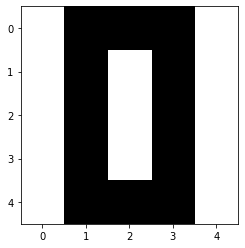

In [47]:
import matplotlib.pyplot as plt
tmp = np.array([[255, 0, 0, 0, 255], [255, 0, 255, 0, 255], [255, 0, 255, 0, 255], 
                     [255, 0, 255, 0, 255], [255, 0, 0, 0, 255]])
plt.imshow(tmp, cmap='gray', vmin=0, vmax=255);
# print(tmp.shape)

a = np.array([[1,1,1],
            [2,2,2],
            [3,3,3]])
b = np.array([[0,0,0],
             [1,1,1],
             [2,2,2]])
c = a - b
print(c)
print(np.sum(c))

Ảnh màu được sử dụng phổ biến là ảnh RGB, trong đó, mỗi điểm ảnh sẽ lưu trữ 3 thông tin kênh màu (mỗi kênh màu 1 byte) là: R (red - đỏ), G (green - xanh lá), B (blue - xanh dương). Ta có thể sử dụng ma trận:
```
                    [[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]]
```
để biểu diễn cho ảnh màu có nội dung sau:

(5, 5, 3)
[ 4225   256 37249]
[ 65  16 193]


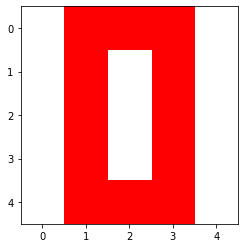

In [50]:
np_arr = np.array([[[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 255, 255], [255, 0, 0], [255, 255, 255]],
                     [[255, 255, 255], [255, 0, 0], [255, 0, 0], [255, 0, 0], [255, 255, 255]]])
plt.imshow(np_arr);
np_arr.reshape(np_arr.shape[0] * np_arr.shape[1], np_arr.shape[2])
print(np_arr.shape)
a = np.array([65,16,193])
print(a**2)
print(a)

Như vậy, số màu trong ảnh RGB có thể là $256^3 \approx 1.7 \times 10^7$. Với số lượng màu khá lớn, khi lưu trữ ảnh có thể sẽ tốn chi phí lưu trữ. Do đó bài toán đặt ra là giảm số lượng màu để biểu diễn ảnh sao cho nội dung ảnh được bảo toàn nhất có thể.

Cho ảnh như sau:

![img](https://scontent.fhan4-2.fna.fbcdn.net/v/t1.6435-9/108021534_2792519034314628_43786322214829236_n.jpg?_nc_cat=111&ccb=1-7&_nc_sid=730e14&_nc_ohc=u7A7KXOiHU8AX8tU79-&tn=vv22AQwGHZ3TiJCI&_nc_ht=scontent.fhan4-2.fna&oh=00_AT9DjF6wuEeMVU2JmKk4vhjulF65hj2ltIftCLLWA_zhQg&oe=62B9F090)

Trong ví dụ trên, số lượng màu cho ảnh ban đầu là 439 màu. Sau khi giảm số lượng màu xuống còn 5, ảnh không còn được chi tiết nhưng cơ bản vẫn bảo toàn nội dung của ảnh ban đầu.

Để thực hiện giảm số lượng màu, ta cần tìm ra các đại diện có thể thay thế cho một nhóm màu. Cụ thể trong trường hợp ảnh RGB, ta cần thực hiện gom nhóm các pixel ($\mathbb{R}^3$) và chọn ra đại diện cho từng nhóm. Như vậy, bài toán trên trở thành gom nhóm các vec-tơ.

#### Yêu cầu

Trong đồ án này, bạn được yêu cầu cài đặt chương trình giảm số lượng màu cho ảnh sử dụng thuật toán [K-Means](https://en.wikipedia.org/wiki/K-means_clustering).

Các thư viện được phép sử dụng là: `NumPy` (tính toán ma trận), `PIL` (đọc, ghi ảnh), `matplotlib` (hiển thị ảnh).

Một số gợi ý:
- Đọc ảnh: `PIL.Image.open(...)`
- Hiển thị ảnh: `matplotlib.pyplot.imshow(...)`
- Thay đổi shape cho `np.ndarray`: `np.reshape(...)`
- Khai báo hàm gợi ý cho thuật toán K-Means:
```python
def kmeans(img_1d, k_clusters, max_iter, init_centroids='random'):
    '''
    K-Means algorithm
    
    Inputs:
        img_1d : np.ndarray with shape=(height * width, num_channels)
            Original image in 1d array
        
        k_clusters : int
            Number of clusters
            
        max_iter : int
            Max iterator
            
        init_cluster : str
            The way which use to init centroids
            'random' --> centroid has `c` channels, with `c` is initial random in [0,255]
            'in_pixels' --> centroid is a random pixels of original image
            
    Outputs:
        centroids : np.ndarray with shape=(k_clusters, num_channels)
            Store color centroids
            
        labels : np.ndarray with shape=(height * width, )
            Store label for pixels (cluster's index on which the pixel belongs)
    
    '''
    
    ### YOUR CODE HERE
```

<font style="color:red">*Lưu ý: Không sử dụng K-Means đã được cài đặt sẵn trong các thư viện trong bài nộp. Bạn có thể sử dụng K-Means trong `scikit-learn` để kiểm tra.* </font>

**Sinh viên cần viết chương trình `main` cho phép**:
- Người dùng nhập vào tên tập tin ảnh mỗi lần chương trình thực thi (gợi ý sử dụng `input()` trong Python)
- Lựa chọn định dạng lưu ảnh đầu ra gồm: `png`, `pdf`

### Quy định bài nộp <a class="anchor" id="c22"></a>

* Thực hiện toàn bộ bài làm trên 1 tập tin Jupyter Notebook (.ipynb) hoặc Python (.py)


* Bạn nộp tập tin `MSSV.zip` được nén từ thư mục MSSV chứa các tập tin sau:
    1. Báo cáo toàn bộ bài làm: `MSSV.pdf`
    2. Mã nguồn: `MSSV.ipynb` hoặc `MSSV.py`


* Trong đó, nội dung tập tin báo cáo gồm có:
    - Thông tin cá nhân: Họ và tên, MSSV
    - Ý tưởng thực hiện, mô tả các hàm
    - Hình ảnh kết quả với từng số lượng màu, `k = {3, 5, 7}`. Sinh viên có thể thử nghiệm thêm `k` khác
    - **Nhận xét kết quả trên**
    - Báo cáo cần có số trang và tài liệu tham khảo
    
* Ví dụ minh họa cây thư mục bài nộp sau khi giải nén tập tin `MSSV.zip` như sau:
```
MSSV
├── MSSV.pdf
└── MSSV.ipynb
```

### Quy định chấm bài <a class="anchor" id="c23"></a>

Đồ án chiếm **10%** điểm tổng kết.

Những trường hợp sau đây sẽ bị 0 điểm toàn bộ đồ án:
* Nộp sai quy định
* Không có báo cáo
* Thực thi mã nguồn báo lỗi

<font style="color:red">**LƯU Ý: SAO CHÉP BÀI LÀM CỦA NHAU SẼ BỊ 0 ĐIỂM TOÀN BỘ PHẦN THỰC HÀNH**</font>